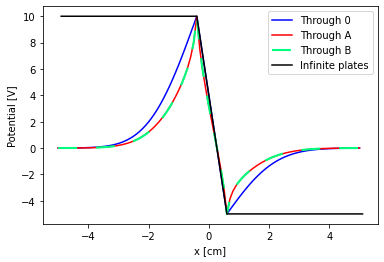

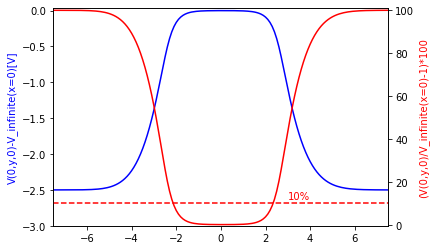

Beyond x= 2.337 the difference is larger than 10.0%
Beyond x= -2.135 the difference is larger than 10.0%
Percentage difference at the left edge of the finite capacitor: 25.84 %


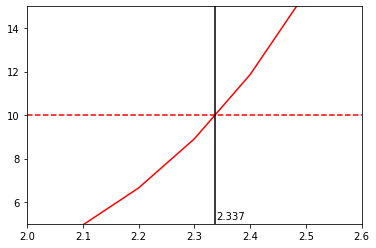

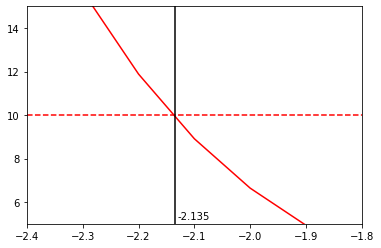

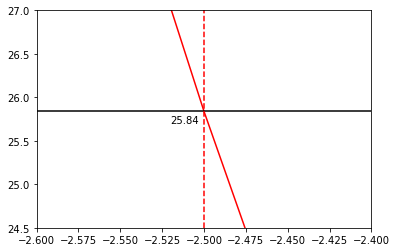

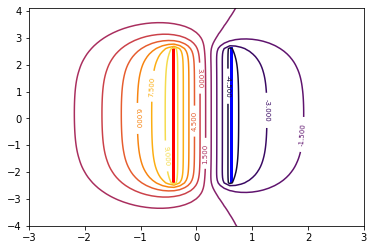

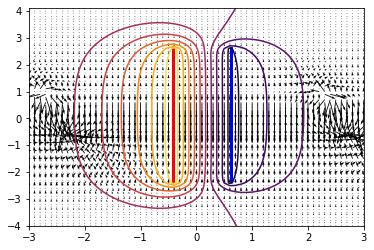

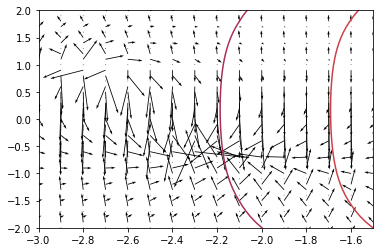

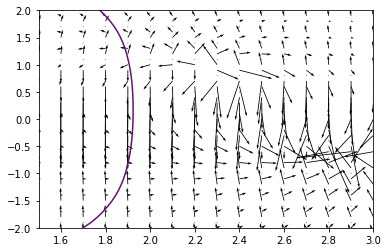

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import scipy.interpolate


#1.- Define the parameters of the problem
l_y=5
l_z=10
d=1
L_x=10
L_y=15
L_z=30

V_1=10
V_2=-5

delta_s=0.1

M_x = 101 
M_y = 151
M_z = 301

x_min=-5
x_max=5
y_min=-7.5
y_max=7.5
z_min=-15
z_max=15

r_tol=10**(-2)

#2.- Define a three-index matrix to contain the potential
V = np.zeros((M_x, M_y, M_z))
x = np.arange(x_min, x_max + delta_s, delta_s)
y = np.arange(y_min, y_max + delta_s, delta_s)
z = np.arange(z_min, z_max + delta_s, delta_s)

#3.- Construct initial potential guess
V[46, 51:102, 101:202] = 10
V[56, 51:102, 101:202] = -5

#4.- Iterate the relaxation cycle for as many iterations as required
@njit
def integration_method(V, M_x, M_y, M_z, r_tol):    
    iter = 0
    max_error = 0

    
    while True:
        iter += 1
        for j in range(1, M_x-1):
            for k in range(1, M_y-1):
                for l in range(1, M_z-1):
                    if j==46 and (51<=k<=101 and 101<=l<=201):
                        continue
                    elif j==56 and (51<=k<=101 and 101<=l<=201):
                        continue
                    
                    node = V[j,k,l]
                    mean = (V[j-1,k,l] + V[j+1,k,l] + V[j,k-1,l] + V[j,k+1,l] + V[j,k,l-1] + V[j,k,l+1]) / 6
                    V[j, k, l] = mean

# #5.- Keep track of relaxation error
                    error = abs(node-mean)
                    max_error = error if error > max_error else max_error
        if max_error < r_tol:
            return V
        
        max_error = 0
    
    return V
# #6.- Produce required output
if __name__ =='__main__': 
    integration_method(V, M_x, M_y, M_z, r_tol)

#6.1 - Exercise 1
V_theo=[]
for j in x: 
    V_j=0
    if abs(j) <= d/2:
        V_j = V_2 + (V_1-V_2)*(d-2*j)/(2*d)
    elif j< -d/2:
        V_j=V_1
    elif j> d/2:
        V_j=V_2
    V_theo.append(V_j)
    

fig, ax = plt.subplots()
plt.ylabel('Potential [V]')
plt.xlabel('x [cm]')
ax.plot(x, V[:, 76 , 151], color='blue', label='Through 0')
ax.plot(x, V[:, 51 , 151], color='red', label='Through A') 
ax.plot(x, V[:, 76 , 101], color='springgreen', label='Through B', linestyle='--',lw=2.1, dashes=(9, 9))
ax.plot(x+0.1, V_theo, color='black', label='Infinite plates')
plt.legend()
plt.show()


#6.2 - Exercise 2
PD=[]
for j in range(0,len(y)):
    PD_j=abs(V[51,j,150]/2.5-1)*100
    PD.append(PD_j)    
    
fig, ax = plt.subplots()
ax2=ax.twinx()
ax2.set_xlim(-7.5,7.5)

ax.set_ylabel('V(0,y,0)-V_infinite(x=0)[V]', color='blue')
ax.plot(y, V[51, : , 151] - 2.5, color='blue')
ax.set_ylim(-3,0.03)

ax2.set_ylabel('(V(0,y,0)/V_infinite(x=0)-1)*100', color='red')
ax2.set_ylim(-0.5,100.9)
ax2.plot(y, PD, color='red')
ax2.axhline(10, color='red', linestyle='--')
ax2.text(3, 12, '10%', color = 'red')

plt.show()

y_interp = scipy.interpolate.interp1d(y, PD)
print(*[f'Beyond x= {x} the difference is larger than {round(float(y_interp(x)),1)}%'  for x in np.arange(2.337,2.3371,0.0001)])
print(*[f'Beyond x= {x} the difference is larger than {round(float(y_interp(x)),1)}%'  for x in np.arange(-2.1350,-2.13499,0.0001)])
print('Percentage difference at the left edge of the finite capacitor:', round(float(y_interp(-2.5)),2),'%')

plt.ylim(5,15)
plt.xlim(2,2.6)
plt.plot(y, PD, color='red')
plt.axhline(10, color='red', linestyle='--')
plt.axvline(2.337, color='black')
plt.text(2.34, 5.2, '2.337', color = 'black')
plt.show()

plt.ylim(5,15)
plt.xlim(-2.4, -1.8)
plt.plot(y, PD, color='red')
plt.axhline(10, color='red', linestyle='--')
plt.axvline(-2.135, color='black')
plt.text(-2.13, 5.2, '-2.135', color = 'black')
plt.show()

plt.ylim(24.5,27)
plt.xlim(-2.6, -2.4)
plt.plot(y, PD, color='red')
plt.axhline(25.84, color='black')
plt.axvline(-2.5, color='red', linestyle='--')
plt.text(-2.52, 25.7, '25.84', color = 'black')
plt.show()

#6.3 - Exercise 3
fig, ax = plt.subplots()
contour= ax.contour(x, y, V[:, : , 151].T, levels=12, cmap='inferno')
ax.set_ylim(-4,4.1)
ax.set_xlim(-3,3)
ax.clabel(contour, inline=True, fontsize=7)
ax.add_patch(plt.Rectangle((-0.44,-2.35),0.04,5, color='red'))
ax.add_patch(plt.Rectangle((0.6,-2.35),0.04,5, color='blue'))
plt.show()

fig, ax = plt.subplots()
X, Y = np.meshgrid(x, y)
contour= ax.contour(X, Y, V[:, : , 151].T, levels=12, cmap='inferno')
ax.set_ylim(-4,4.1)
ax.set_xlim(-3,3)
ax.add_patch(plt.Rectangle((-0.44,-2.35),0.04,5, color='red'))
ax.add_patch(plt.Rectangle((0.6,-2.35),0.04,5, color='blue'))
v, u = np.gradient(V[:, : , 151])
plt.quiver(X, Y, u, v, scale=30)
plt.show()

fig, ax = plt.subplots()
contour= ax.contour(X, Y, V[:, : , 151].T, levels=12, cmap='inferno')
ax.set_ylim(-2,2)
ax.set_xlim(-3,-1.5)
plt.quiver(X, Y, u, v, scale=15)
plt.show()

fig, ax = plt.subplots()
contour= ax.contour(X, Y, V[:, : , 151].T, levels=12, cmap='inferno')
ax.set_ylim(-2,2)
ax.set_xlim(1.5,3)
plt.quiver(X, Y, u, v, scale=15)
plt.show()